1/ Preprocessing phase

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importation of dataset
house= pd.read_csv("C:\\Users\\YASSI\\Downloads\\kc_house_data (1).csv",sep=',', parse_dates=['date'])
house.head(-5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,2015-03-26,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [3]:
house.isnull().sum()  #Data not having any NaNs

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


2/ Visualization phase

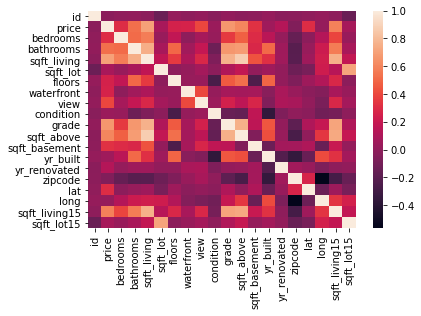

In [11]:
corrMatrix = house.corr()
sns.heatmap(corrMatrix)
plt.show()

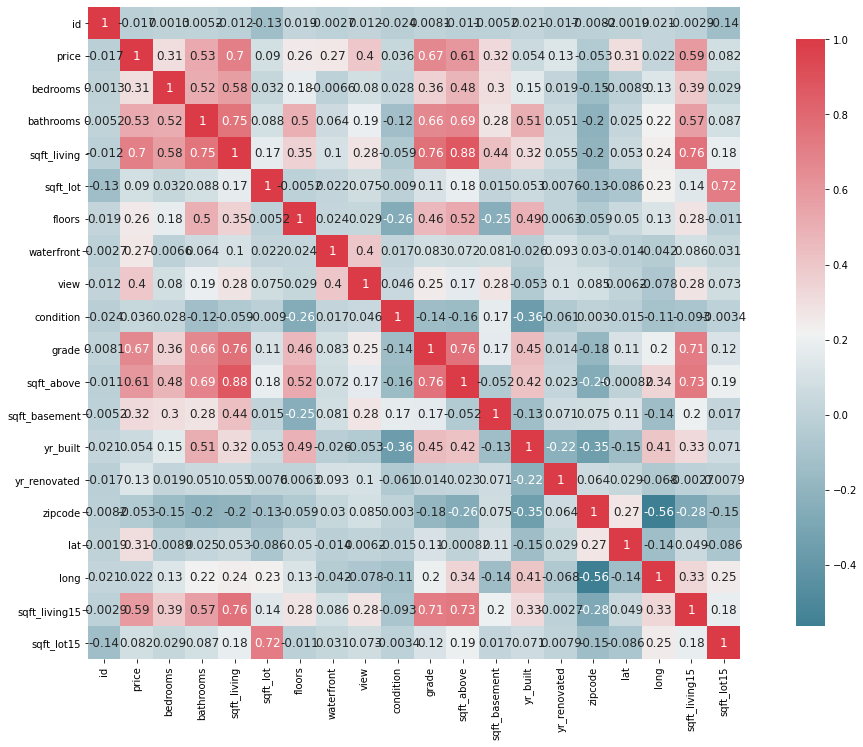

In [8]:
def plot_correlation_map( house ):

    corr = house.corr()

    s , ax = plt.subplots( figsize =( 20 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(house)

In [4]:
house[house.columns].corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

from the graph of correlation and the correlation function on price and the other columns,  i can see a stong correlation between price , bedrooms, bathrooms, sqft living,sqft above, grade 
and a weak correlation between price and id , condition, zipcode, long, sqft_lot, sqft_lot15, yr_built

so the Top 5 features:

bedrooms,
bathrooms,
sqft_living,
sqft_above,
grade.

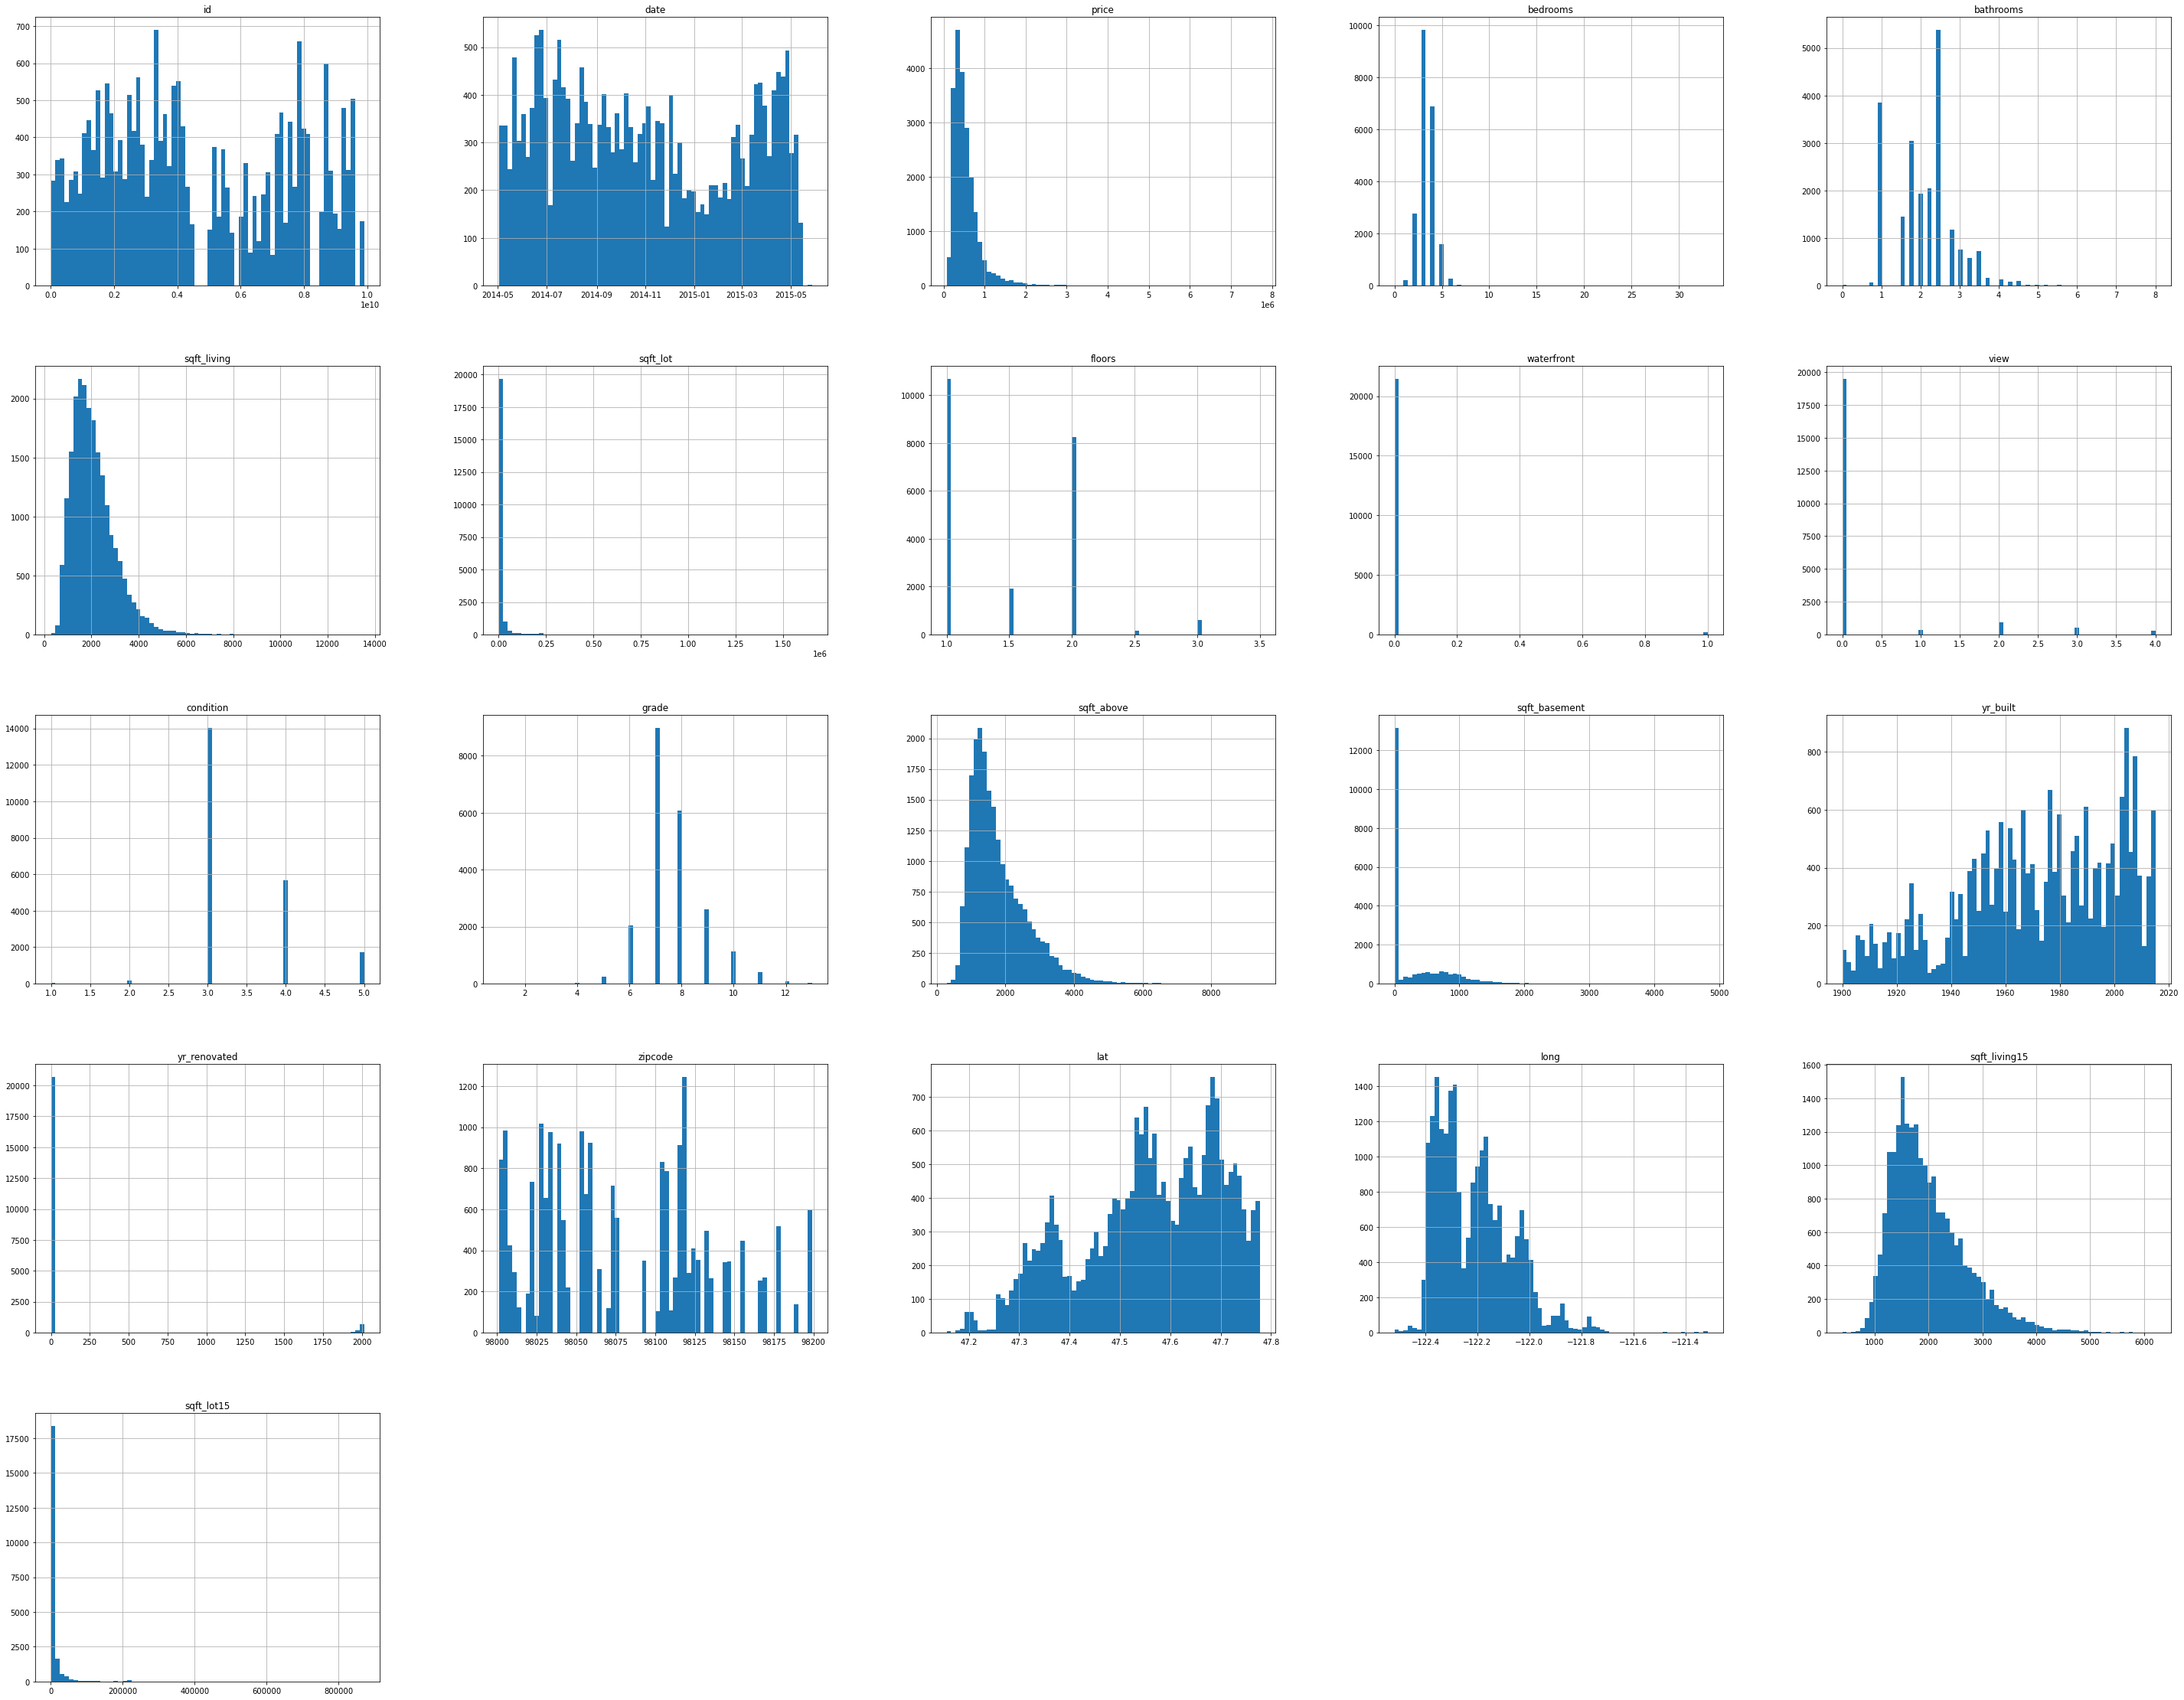

In [12]:
house.hist(bins=70, figsize=(50, 40))
plt.show()

In [25]:
new_house=house
new_house=new_house.drop('id',axis=1)
new_house=new_house.drop('date',axis=1)
new_house=new_house.drop('sqft_lot',axis=1)
new_house=new_house.drop('sqft_lot15',axis=1)
new_house=new_house.drop('condition',axis=1)
new_house=new_house.drop('zipcode',axis=1)
new_house=new_house.drop('yr_built',axis=1) 
new_house=new_house.drop('long',axis=1)
new_house.dropna(axis=1, how='any')
new_house

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1410


3/Split your dataset into a training set and a testing set. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [31]:
x=new_house["sqft_living"].values[:,np.newaxis]
y=new_house["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)#splitting data with test size of 30%


#4/  Apply linear regression to the training set. 

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


5/Linear Regression Plot

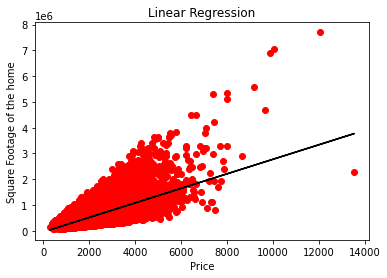

In [32]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Square Footage of the home")
plt.xlabel("Price")
plt.plot(x,model.predict(x),color="k")
plt.show()

5/ Measure the performance of linear regression using the testing set.

In [33]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 63595386112.83998
R squared 0.5053104226540768


R_squared near to 0.5 so half of the out put variation can be explained by the model's inputs. so our model is not perfect.

In [36]:
print("a = ",model.coef_)
print("b = ",model.intercept_)

a =  [281.90496509]
b =  -46960.083364302176


Previously, I fed my model Square Footage of the home as a single input variable, which is logically not enough since there is more than one important input to predict the price of a house. (such as nombre of bedrooms).

6/ Apply multiple-linear regression

In [35]:
xm=new_house[["bedrooms","bathrooms","sqft_living","floors","waterfront","view","grade","sqft_above","sqft_basement","yr_renovated","lat","sqft_living15"]]
ym=new_house["price"].values
xm_train,xm_test,ym_train,ym_test=train_test_split(xm,ym,test_size=0.3,random_state=40)#splitting data with test size of 30%

#  Apply multiple-linear regression to the training set. 

modelm=LinearRegression() #build linear regression model
modelm.fit(xm_train,ym_train) #fitting the training data
predictedm=modelm.predict(xm_test) #testing our model’s performance

print("MSE", mean_squared_error(ym_test,predictedm))
print("R squared", metrics.r2_score(ym_test,predictedm))

MSE 42808666616.48
R squared 0.6670041257761408


Now i found a very lilttle upgarde from linear regression but it is not engouh. it is always around 0.5.

In [20]:
import math
math.sqrt(mean_squared_error(y_test,predicted))

197516.58712746794

7/ Apply polynomial regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures 

xp=new_house[["bedrooms","bathrooms","sqft_living","floors","waterfront","view","grade","sqft_above","sqft_basement","yr_renovated","lat","sqft_living15"]]
yp=new_house["price"].values

xp_train, xp_test, yp_train, yp_test = train_test_split(xp, yp, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(xp_train) #transforming our input data
lg.fit(x_train_fit, yp_train)
xp_test_ = poly.fit_transform(xp_test)
predictedp = lg.predict(xp_test_)

print("MSE: ", metrics.mean_squared_error(yp_test, predictedp))
print("R squared: ", metrics.r2_score(yp_test,predictedp))

MSE:  32263194189.148636
R squared:  0.7433675794867587


When applying polynominal regression degree 2 Our model is performing well then applying linear and multi linear regression.

Polynomial Regression Plot

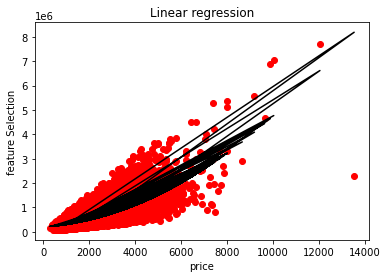

In [41]:
xp= new_house["sqft_living"].values.reshape(-1,1)
yp= new_house["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(xp, yp, color="r")
plt.title("Linear regression")
plt.ylabel("feature Selection")
plt.xlabel("price")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 